In [1]:
import time

import math

def quicksort(a):
    _qsort(a,0,len(a)-1)
    
def _qsort(a, lo, hi):
    # For small arrays insertion sort is to be prefered: no recursion.
    # The implementation of sorted in Python uses insertion sort 
    # for arrays of length less than 64. So we can use that. 
    # The base case is then
    #     if lo + 64 > hi: a[lo:hi+1] = sorted(a[lo:hi+1]) 

    # but, at least three elements for the base case (think of partition):
    if lo + 2 > hi: a[lo:hi+1] = sorted(a[lo:hi+1]) 
    else: 
        _pivot(a, lo, hi)
        i = _partition(a, lo, hi)
        _qsort(a, lo, i - 1)
        _qsort(a, i + 1, hi)
        
        
def _swap(a,i,j):
    a[i], a[j] = a[j], a[i]
    
def _pivot(a, lo, hi):
    mid = (lo + hi) // 2
    # sort lo, mid, hi:
    if a[mid] < a[lo]:
        _swap(a, lo, mid)
    if a[hi] < a[lo]:
        _swap(a, lo, hi)
    if a[hi] < a[mid]:
        _swap(a, mid, hi)

def _partition(a, lo, hi):
    # place the pivot out of the way, in position hi -1 
    mid = (lo + hi)//2
    _swap(a, mid, hi - 1)
    
    # initialize the indices to walk through the array from low to high and from hight to low
    i = lo
    j = hi - 1
    pivot = a[j]
    
    # the algorithm that Tim explains
    while True:
        while True:
            i += 1
            if a[i] >= pivot: break
           
        while True:
            j -= 1
            if a[j] <= pivot: break
            
        if i >= j: break
        _swap(a, i, j)

    # put the pivot in place and return the position of the pivot    
    _swap(a, i, hi - 1)
    return i

<hr style="border:1px solid silver"> </hr>

# Exercise 1

Complete the definition of the function 

```Python
tabulate_T_n(start, times)
```
to study the execution time of quicksort. You will need to do the following:

1. Use the function ```generator``` (see the notebook for week 2) that generates random arrays of a given size to 

    * generate 10 arrays of a given length (size N)
    
    * for each of the arrays meassure the time it takes to sort them
    
    * calculate the average of the 10 values
    
    * this is the value of T(N) that is the meassured execution time of the sorting algorithm for arrays of size N.
    
    
2. Use this for 10 different sizes where you duplicate the size each time. Start with size 800, you will have to do it for sizes 800, 1600, 3200, 6400, 12800, 25600, 51200, 102400, 204800, 409600. Remember that we are interested in big values (one of the guiding assumptions for doing asymptotic analysis)
    
3. Use this to calculate a table (It will take some time: be patient, you are sorting many big arrays!)

|    N      | T(N)  |
|:---------:|:-----:|
| start     | $t_0$ |
| 2 * start | $t_1$ |
| 4 * start | $t_2$ |
| 8 * start | $t_3$ |
| $\ldots $ | $\ldots$|
| $2^9$ * start|  $t_9$ |

You do not need to print it as a table: generate a list of pairs ```[(start, T(start)), (2*start,T(2*start)), ..., (size, T(size)]```

<hr style="border:1px solid silver"> </hr>


In [2]:
import random
import time
import math
def tabulate_T_n(start, times):
    mytupple=[];
    for x in range(0,times):
        val=sort_impl(start*pow(2,x),10)
        mytupple.append(val)
    return mytupple

 
def sort_impl(start,n):
    sum=0
    for i in range(n):
        arr=_generateRandom(-start, start)
        start_time=time.time()
        quicksort(arr)
        end_time=time.time()
        sum += end_time-start_time
    return(start, sum/n)



def _generateRandom(low, high):
    return random.sample(range(low,high),high)
   

arr=[]    
start=800
table = tabulate_T_n(start, 10)
print(table)


[(800, 0.00029947757720947263), (1600, 0.001703929901123047), (3200, 0.0022917747497558593), (6400, 0.007649421691894531), (12800, 0.01660740375518799), (25600, 0.03319845199584961), (51200, 0.07044997215270996), (102400, 0.15399377346038817), (204800, 0.3492702007293701), (409600, 0.8416143178939819)]


<hr style="border:1px solid silver"> </hr>

# Exercise 2

The videos also explained that the Big Oh analysis of quicksort.

The variable```extended_table``` below is an extension of your table with values for 

|    N      | T(N)  | log(N) | N log(N) | N * N |
|:---------:|:-----:|:-----: |:-----:|:-----:|
| start     | $t_0$ |        |       |       |
| 2 * start | $t_1$ |        |       |        |
| 4 * start | $t_2$ |        |       |        |
| 8 * start | $t_3$ |        |        |       |
| $\ldots $ | $\ldots$|     |        |         |
| $2^9$ * start|  $t_9$ |     |      |        |

You can try to understand what function grows as fast as T(N) by taking quotients of the values of T(N) with the values of the other functions for each N. For example T(start)/log(start). One of the columns will converge to better than the other ones. This means that T(N) and that function grow at more or less the same speed! T(N) Big-O of that function.

from IPython.display import HTML, display
import tabulatePresent this analysis of your table (show all the values you calculate. You can program the calculations if you want!) and pick the function that best describes the growth of T(N). This is mostly an analysis exercise, not a programming exercise! That is why the cell for your answer is a Markdown cell where you can write text and not a Code cell.

n,time,logn,nlogn,n2
800,0.00029947757720947263,9.643856189774725,7715.08495181978,640000
1600,0.001703929901123047,10.643856189774725,17030.169903639562,2560000
3200,0.0022917747497558593,11.643856189774725,37260.339807279124,10240000
6400,0.007649421691894531,12.643856189774725,80920.67961455825,40960000
12800,0.01660740375518799,13.643856189774725,174641.3592291165,163840000
25600,0.03319845199584961,14.643856189774725,374882.718458233,655360000
51200,0.07044997215270996,15.643856189774725,800965.436916466,2621440000
102400,0.15399377346038817,16.643856189774723,1704330.8738329317,10485760000
204800,0.3492702007293701,17.643856189774723,3613461.7476658635,41943040000
409600,0.8416143178939819,18.643856189774723,7636523.495331727,167772160000


[0.00029947757720947263, 0.001703929901123047, 0.0022917747497558593, 0.007649421691894531, 0.01660740375518799, 0.03319845199584961, 0.07044997215270996, 0.15399377346038817, 0.3492702007293701, 0.8416143178939819]


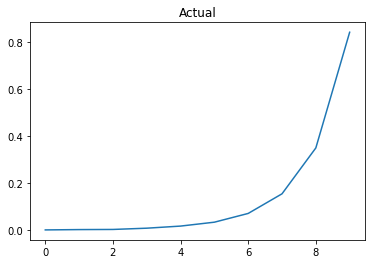

[9.643856189774725, 10.643856189774725, 11.643856189774725, 12.643856189774725, 13.643856189774725, 14.643856189774725, 15.643856189774725, 16.643856189774723, 17.643856189774723, 18.643856189774723]


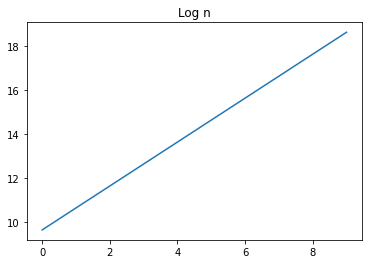

[7715.08495181978, 17030.169903639562, 37260.339807279124, 80920.67961455825, 174641.3592291165, 374882.718458233, 800965.436916466, 1704330.8738329317, 3613461.7476658635, 7636523.495331727]


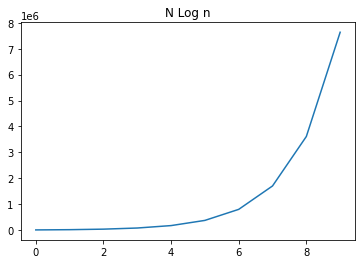

[640000, 2560000, 10240000, 40960000, 163840000, 655360000, 2621440000, 10485760000, 41943040000, 167772160000]


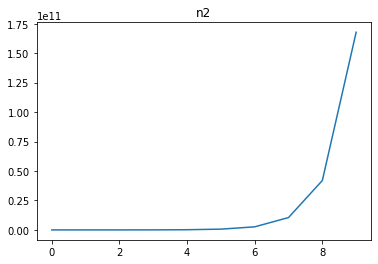

In [3]:
from tabulate import tabulate

import matplotlib.pyplot as plt
from IPython.display import HTML,display

header=[("n","time","logn","nlogn","n2")]
extended_table = [(n,t,math.log2(n),n*math.log2(n),n**2) for n,t in table]
display(HTML(tabulate(header+extended_table, tablefmt='html')))


x=[i for i in range(10)]

#Actual graph
y = [t for n,t,logn,nlogn,n2 in extended_table]
print(y)
plt.plot(x, y)
plt.title('Actual')
plt.show()



#logn graph
y = [logn for n,t,logn,nlogn,n2 in extended_table]
print(y)
# plotting the points
plt.plot(x, y)
plt.title('Log n')
plt.show()


#nlogn graph
y = [nlogn for n,t,logn,nlogn,n2 in extended_table]
print(y)
plt.plot(x, y)
plt.title('N Log n')
plt.show()

#n2 graph
y = [n2 for n,t,logn,nlogn,n2 in extended_table]
print(y)
plt.plot(x, y)
plt.title('n2')
plt.show()





<hr style="border:1px solid silver"> </hr>

# Exercise 3

We are interested in understanding whether the number of elements that we use to cut off the recursion in quicksort (see the base case) really affects the execution time of the program.

Write a program that uses the method of Exercise 1 to meassure the execution time of the algorithm for arrays with sizes as in Exercise 1 for three versions of the algorithm: with cut off 2, 20 and 64. Show the results you get and explain whether the value of the cut off is of any importance.

In [4]:
from tabulate import tabulate
import time
import random
import math
   
def _qsortCutoff(a, lo, hi, cutoff):
    if lo + cutoff > hi:
        a[lo:hi+1] = sorted(a[lo:hi+1])
    else:
        _pivot(a, lo, hi)
        i = _partition(a, lo, hi)
        _qsortCutoff(a, lo, i - 1, cutoff)
        _qsortCutoff(a, i + 1, hi, cutoff)

def tabulate_T_n_cutoff(start, times, cutoff=0):
    mytupple=[];
    for x in range(0,times):
        val=sort_impl_cutoff((start*(2**x)), 10, cutoff)
        mytupple.append(val)
    return mytupple

def sort_impl_cutoff(start, n, cutoff=0):
    sum=0
    for i in range(n):
        arr=_generateRandom(-start, start)
        start_time=time.time()
        if cutoff==0:
            quicksort(arr)
        else:
            _qsortCutoff(arr,0,len(arr)-1, cutoff)
        end_time=time.time()
        sum += end_time-start_time
    return(start, sum/n)

start=800
print("Time taken for Cutoff 2 ")
table1 = tabulate_T_n_cutoff(start, 10, 2)
print(tabulate(table1))

print("Time taken for Cutoff 20 ")
table2 = tabulate_T_n_cutoff(start, 10,20)
print(tabulate(table2))

print("Time taken for Cutoff 64 ")
table3 = tabulate_T_n_cutoff(start, 10,64)
print(tabulate(table3))


Time taken for Cutoff 2 
------  ----------
   800  0.00057776
  1600  0.00169389
  3200  0.00376537
  6400  0.00669968
 12800  0.014853
 25600  0.0337008
 51200  0.0701997
102400  0.154514
204800  0.343081
409600  0.799393
------  ----------
Time taken for Cutoff 20 
------  ----------
   800  0
  1600  0
  3200  0.00219038
  6400  0.00368924
 12800  0.0104184
 25600  0.0221291
 51200  0.0458609
102400  0.108428
204800  0.256563
409600  0.584941
------  ----------
Time taken for Cutoff 64 
------  -----------
   800  0.000499177
  1600  0.000589538
  3200  0.00139551
  6400  0.00358806
 12800  0.0076273
 25600  0.0184015
 51200  0.0434119
102400  0.0974322
204800  0.236307
409600  0.542699
------  -----------
